In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X, y = make_regression(n_samples=1000, n_features=1, noise=25)
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)

In [3]:
print('mean input: ', X.mean())

mean input:  0    0.00989
dtype: float64


In [4]:
print('mean output: ', y.mean())

mean output:  0    1.055536
dtype: float64


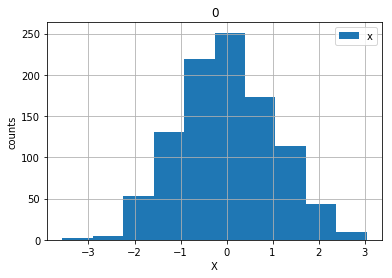

In [5]:
plt.figure(figsize=(4,3), dpi=150);
X.hist()
plt.xlabel('X')
plt.ylabel('counts')
plt.legend('x')

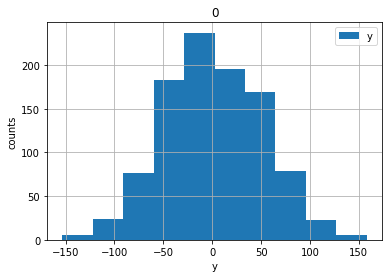

In [6]:
plt.figure(figsize=(4,3), dpi=150);
y.hist()
plt.xlabel('y');
plt.ylabel('counts');
plt.legend('y')

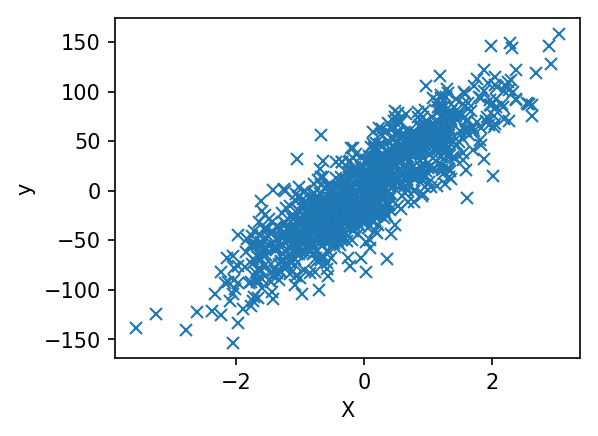

In [7]:
plt.figure(figsize=(4,3), dpi=150);
plt.plot(X,y,'x');
plt.xlabel('X');
plt.ylabel('y');

In [8]:
fit = np.polyfit(X.values.flatten(),y.values.flatten(),1)
print('m: ', fit[0], 'b: ', fit[1])
fitfn = np.poly1d(fit)

m:  43.14205581266328 b:  0.6288489203169555


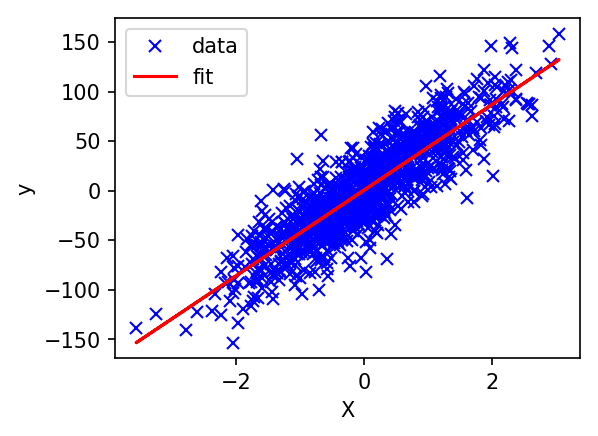

In [9]:
plt.figure(figsize=(4,3), dpi=150)
plt.plot(X, y, 'bx', X, fitfn(X), '-r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['data','fit'])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
linearFit = LinearRegression()

X_train=X[:750]
y_train=y[:750]

X_test=X[750:]
y_test=y[750:]

linearFit.fit(X_train, y_train)
y_pred = linearFit.predict(X_test)

In [13]:
print("Coefficients: \n", linearFit.coef_)

Coefficients: 
 [[43.64180866]]


In [14]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 617.97


In [15]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.75


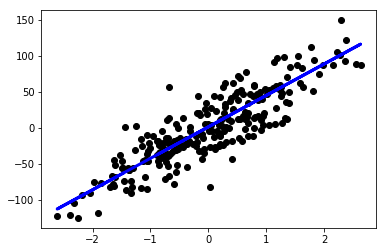

In [16]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)